In [371]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## General structure of the data.

In [372]:
df = pd.read_csv('./raw_data/train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [373]:
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


## Separate categorical from numerical columns

In [374]:
cat_cols = ['person_home_ownership', 'loan_intent', 'loan_grade','cb_person_default_on_file']
num_cols = num_cols = [item for item in df.columns if item not in cat_cols]

## Overview of numerical columns

In [375]:
df[num_cols].describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


## Plot categorical variables

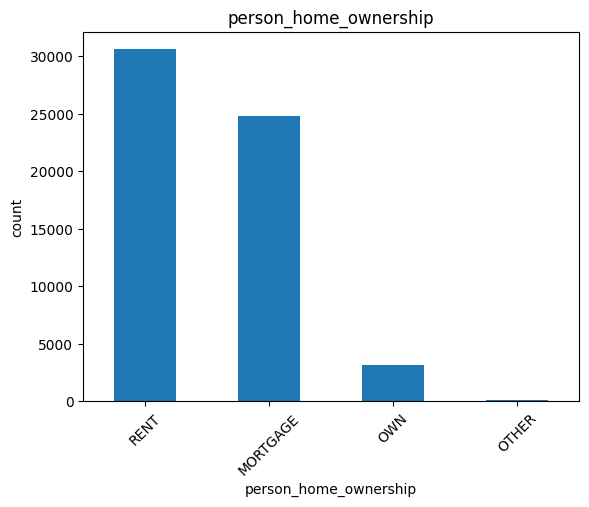

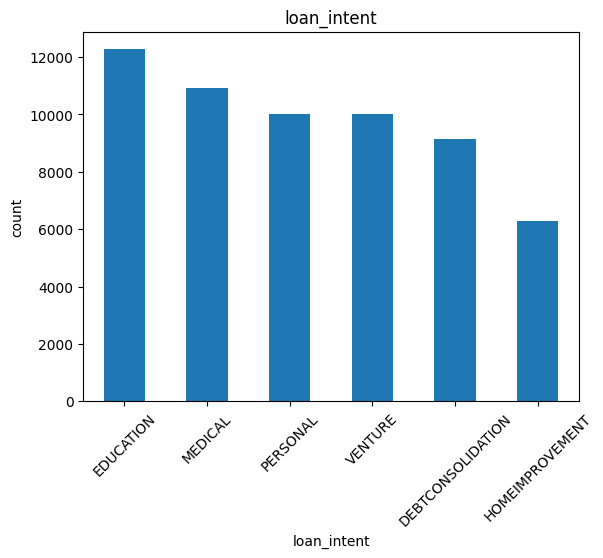

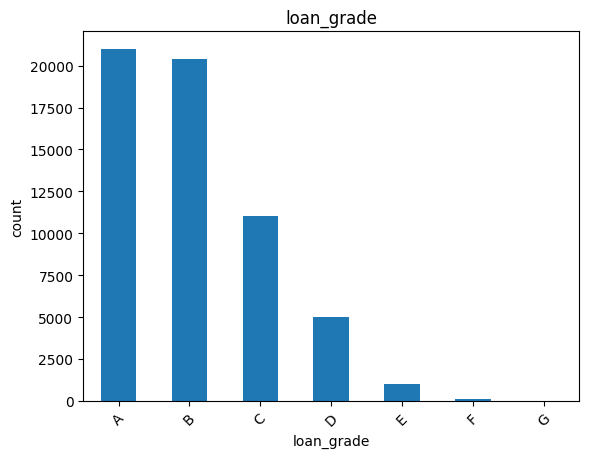

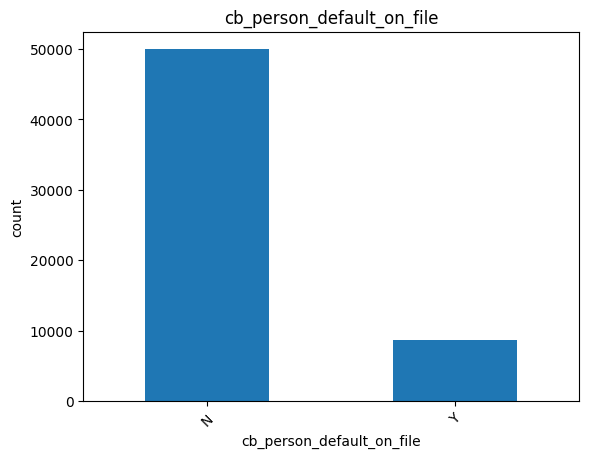

In [376]:
for i in cat_cols:
    counts = df[i].value_counts()
    counts.plot(kind = 'bar')
    plt.ylabel('count')
    plt.title(i)
    plt.xticks(rotation=45)
    plt.show()

## Plot numerical variables

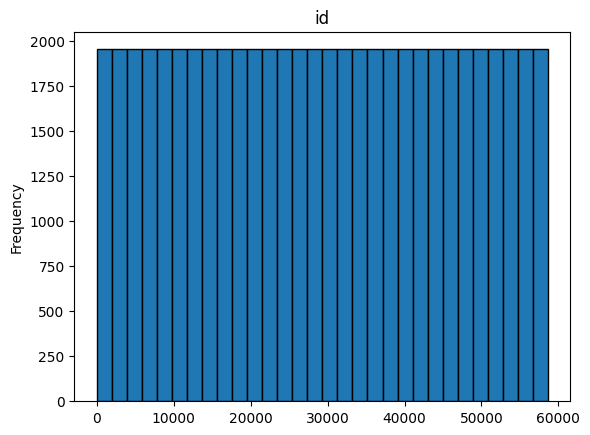

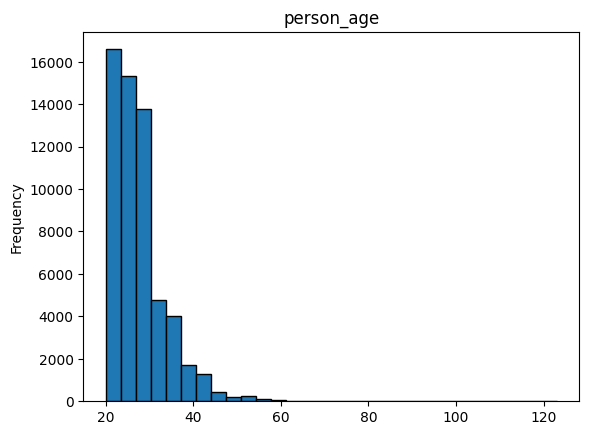

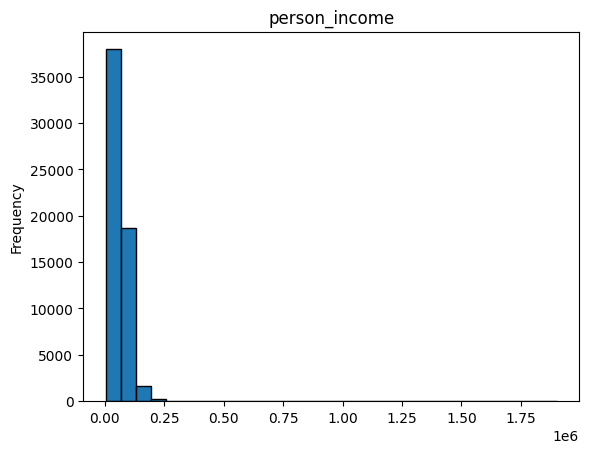

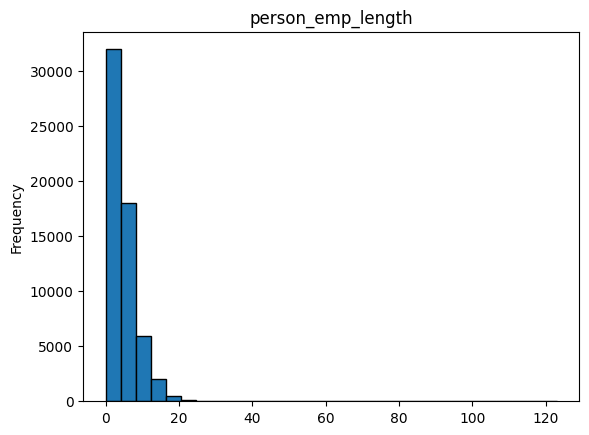

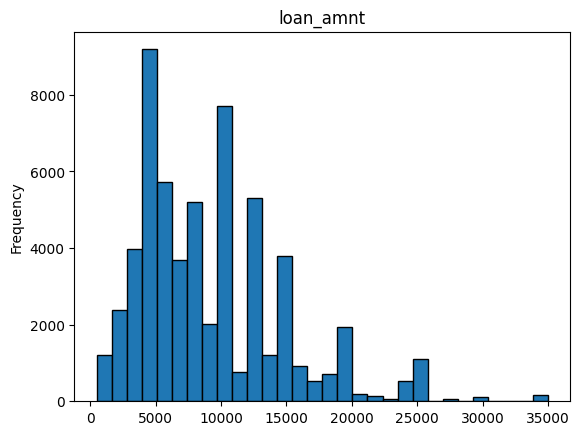

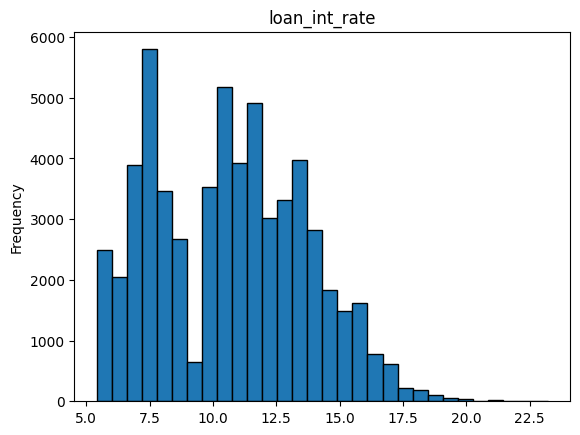

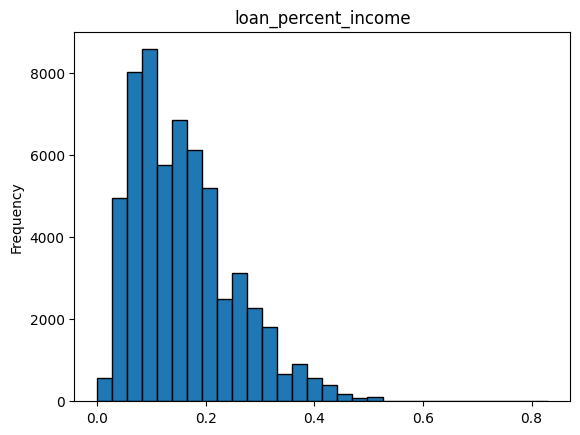

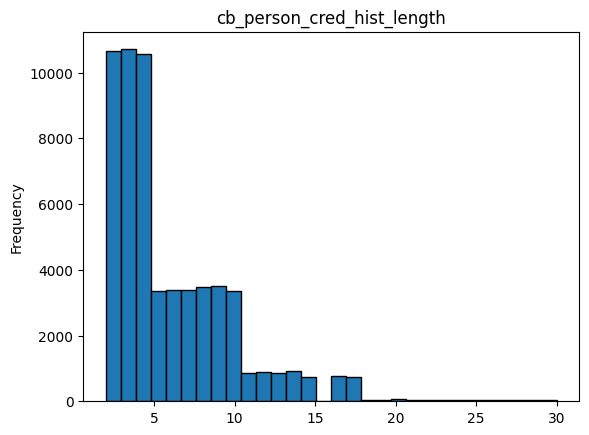

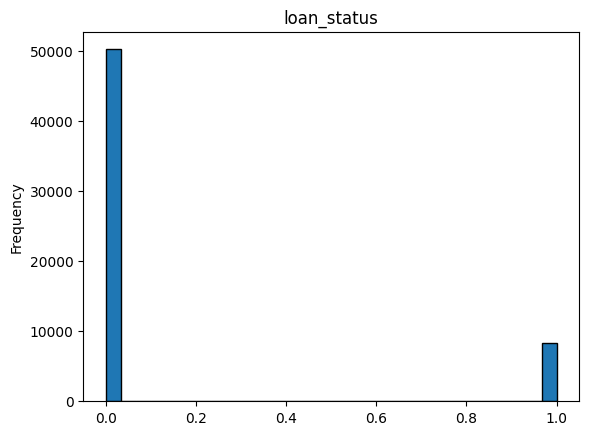

In [377]:
for i in num_cols:
    plt.hist(df[i], bins = 30, edgecolor = 'black')
    plt.ylabel('Frequency')
    plt.title(i)
    plt.show()

## Duplicates - No.

In [378]:
print(df.duplicated().sum())

0


## Missing values - No.

In [379]:
print(df.isna().sum())

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64


#### Overview of categorical data

In [380]:
for col in df[cat_cols]:
    print(f"{col}: {df[col].unique()}")

person_home_ownership: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
loan_intent: ['EDUCATION' 'MEDICAL' 'PERSONAL' 'VENTURE' 'DEBTCONSOLIDATION'
 'HOMEIMPROVEMENT']
loan_grade: ['B' 'C' 'A' 'D' 'E' 'F' 'G']
cb_person_default_on_file: ['N' 'Y']


## Encode categorical data

In [381]:
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].map({'N': 0, 'Y': 1})
df['loan_grade'] = df['loan_grade'].map({'G': 1, 'F': 2, 'E': 3, 'D': 4, 'C': 5, 'B': 6 , 'A': 7}) # needs normalization later
df[cat_cols].head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,RENT,EDUCATION,6,0
1,OWN,MEDICAL,5,0
2,OWN,PERSONAL,7,0
3,RENT,VENTURE,6,0
4,RENT,MEDICAL,7,0


## One-Hot-Encoding

In [382]:
"""
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_cols = ['person_home_ownership','loan_intent']
ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'  # Keep other columns as they are
)
X = ct.fit_transform(df)
encoded_cols = ct.named_transformers_['encoder'].get_feature_names_out(categorical_cols)
other_cols = df.columns.difference(categorical_cols)
all_cols = list(encoded_cols) + list(other_cols)
df = pd.DataFrame(X, columns = all_cols)
df.head()
"""

"\nfrom sklearn.preprocessing import OneHotEncoder\nfrom sklearn.compose import ColumnTransformer\n\ncategorical_cols = ['person_home_ownership','loan_intent']\nct = ColumnTransformer(\n    transformers=[\n        ('encoder', OneHotEncoder(), categorical_cols)\n    ],\n    remainder='passthrough'  # Keep other columns as they are\n)\nX = ct.fit_transform(df)\nencoded_cols = ct.named_transformers_['encoder'].get_feature_names_out(categorical_cols)\nother_cols = df.columns.difference(categorical_cols)\nall_cols = list(encoded_cols) + list(other_cols)\ndf = pd.DataFrame(X, columns = all_cols)\ndf.head()\n"

In [383]:
df.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [384]:
df = pd.get_dummies(df, columns = ['person_home_ownership','loan_intent'])
df.columns

Index(['id', 'person_age', 'person_income', 'person_emp_length', 'loan_grade',
       'loan_amnt', 'loan_int_rate', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length',
       'loan_status', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE'],
      dtype='object')

In [385]:
df.head()

,id,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,...,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,0,37,35000,0.0,6,6000,11.49,0.17,0,14,...,False,False,False,True,False,True,False,False,False,False
1,1,22,56000,6.0,5,4000,13.35,0.07,0,2,...,False,False,True,False,False,False,False,True,False,False
2,2,29,28800,8.0,7,6000,8.90,0.21,0,10,...,False,False,True,False,False,False,False,False,True,False
3,3,30,70000,14.0,6,12000,11.11,0.17,0,5,...,False,False,False,True,False,False,False,False,False,True
4,4,22,60000,2.0,7,6000,6.92,0.10,0,3,...,False,False,False,True,False,False,False,True,False,False


## Normalization (Robust Scaler, because no fixed range , no negative values and no normal distribution)

In [388]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols_to_norm = ['person_age', 'person_income', 'person_emp_length', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_percent_income']
scaled_data = scaler.fit_transform(df[cols_to_norm])
df[cols_to_norm] = pd.DataFrame(scaled_data, columns=cols_to_norm, index = df.index)
print(df.columns)
df.head()

Index(['id', 'person_age', 'person_income', 'person_emp_length', 'loan_grade',
       'loan_amnt', 'loan_int_rate', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length',
       'loan_status', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE'],
      dtype='object')


,id,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,...,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,0,0.165049,0.016246,0.000000,0.833333,0.159420,0.341011,0.204819,0,14,...,False,False,False,True,False,True,False,False,False,False
1,1,0.019417,0.027324,0.048780,0.666667,0.101449,0.445506,0.084337,0,2,...,False,False,True,False,False,False,False,True,False,False
2,2,0.087379,0.012976,0.065041,1.000000,0.159420,0.195506,0.253012,0,10,...,False,False,True,False,False,False,False,False,True,False
3,3,0.097087,0.034708,0.113821,0.833333,0.333333,0.319663,0.204819,0,5,...,False,False,False,True,False,False,False,False,False,True
4,4,0.019417,0.029433,0.016260,1.000000,0.159420,0.084270,0.120482,0,3,...,False,False,False,True,False,False,False,True,False,False


## Correlations

<Axes: >

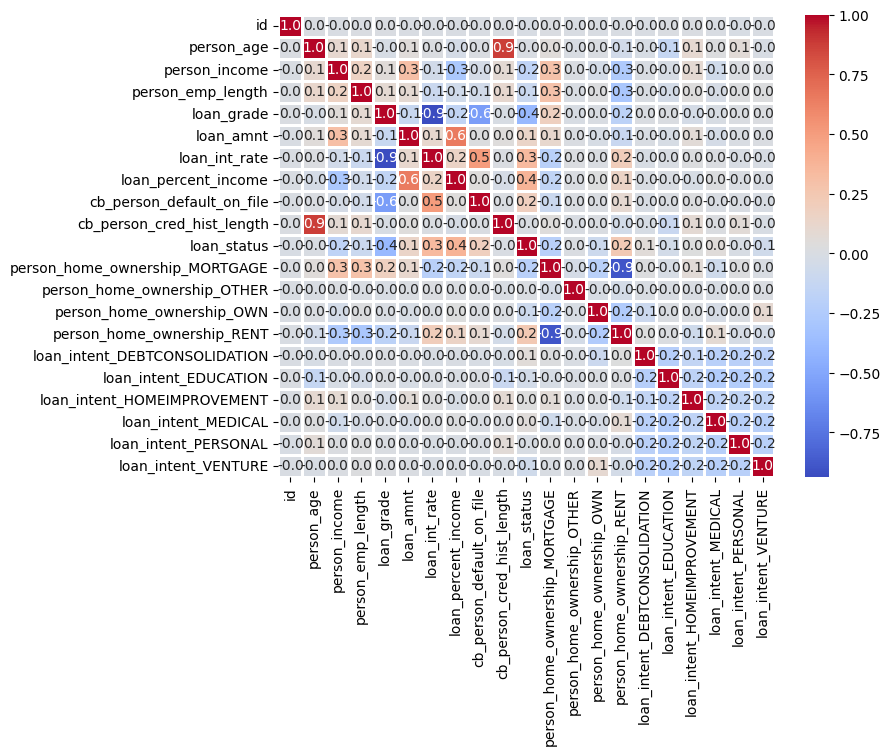

In [403]:
corr_matrix = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.01f', linewidths = 1)

## Pivot Tables

In [425]:
pivot = pd.pivot_table(df, index = 'person_age', columns = 'cb_person_cred_hist_length', aggfunc='size', fill_value = 0)
print(pivot)

cb_person_cred_hist_length    2     3     4    5    6    7    8    9    10  \
person_age                                                                   
0.000000                       5     2     5    0    0    0    0    0    0   
0.009709                     613   553   624    1    0    2    0    0    2   
0.019417                    2395  2287  2367    0    0    1    0    0    1   
0.029126                    2552  2692  2476    1    1    1    3    0    0   
0.038835                    2170  2059  2158    2    0    2    1    1    0   
0.048544                    1638  1753  1675    1    0    0    0    0    0   
0.058252                    1273  1352  1245    0    0    0    2    1    0   
0.067961                       1     1     0  758  773  730  741  680  764   
0.077670                       0     0     1  600  583  675  747  579  520   
0.087379                       0     0     1  485  530  563  551  609  531   
0.097087                       1     1     2  383  346  358  442

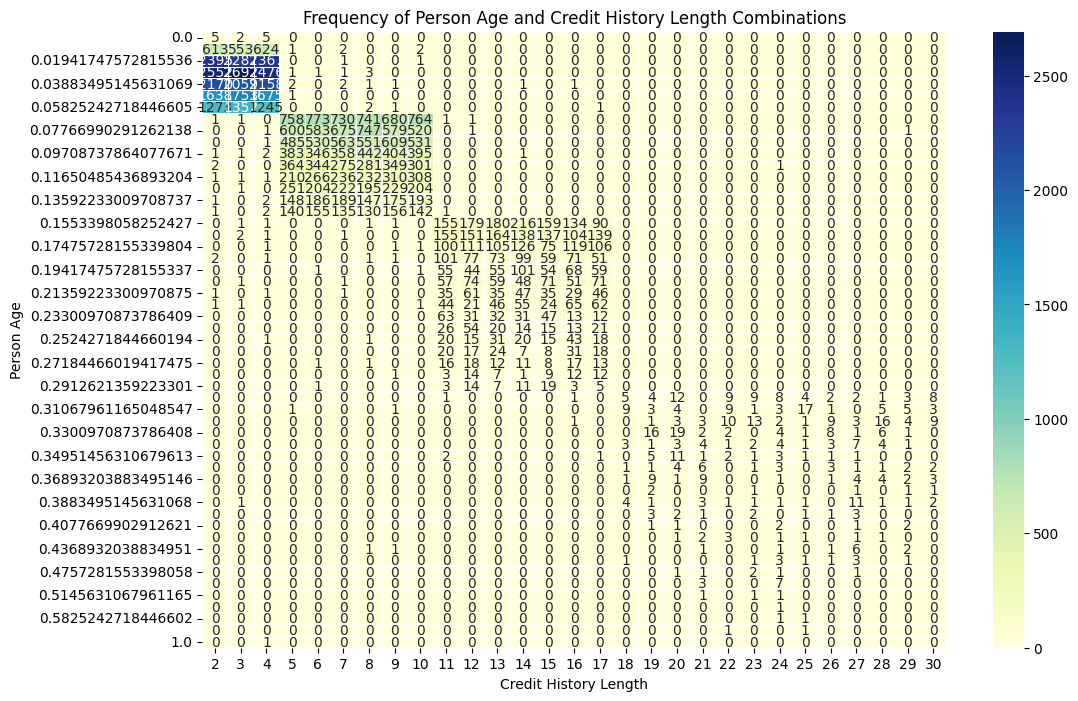

In [428]:
plt.figure(figsize=(12,8))
sns.heatmap(pivot, cmap = 'YlGnBu', annot=True, fmt="d", linewidths = 0.5)
plt.title('Frequency of Person Age and Credit History Length Combinations')
plt.xlabel('Credit History Length')
plt.ylabel('Person Age (Normalized)')
plt.show()